## Import Libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder 

## Load Dataset

In [2]:
data = pd.read_csv('dataset/Dataset of Diabetes .csv')
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


## Data Exploration & Perprocessing

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,340.500000,2.403977e+02,1.0,125.75,300.5,550.25,800.00
No_Pation,1000.0,270551.408000,3.380758e+06,123.0,24063.75,34395.5,45384.25,75435657.00
AGE,1000.0,53.528000,8.799241e+00,20.0,51.00,55.0,59.00,79.00
Urea,1000.0,5.124743,2.935165e+00,0.5,3.70,4.6,5.70,38.90
Cr,1000.0,68.943000,5.998475e+01,6.0,48.00,60.0,73.00,800.00
HbA1c,1000.0,8.281160,2.534003e+00,0.9,6.50,8.0,10.20,16.00
Chol,1000.0,4.862820,1.301738e+00,0.0,4.00,4.8,5.60,10.30
TG,1000.0,2.349610,1.401176e+00,0.3,1.50,2.0,2.90,13.80
HDL,1000.0,1.204750,6.604136e-01,0.2,0.90,1.1,1.30,9.90
LDL,1000.0,2.609790,1.115102e+00,0.3,1.80,2.5,3.30,9.90


In [4]:
data.describe(include='O').T

,count,unique,top,freq
Gender,1000,3,M,565
CLASS,1000,5,Y,840


In [5]:
data['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [7]:
data['CLASS'].value_counts()

CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64

In [8]:
data['CLASS'].str.strip().value_counts()

CLASS
Y    844
N    103
P     53
Name: count, dtype: int64

In [9]:
# strip class values
data['CLASS'] = data['CLASS'].str.strip()

In [10]:
data['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [11]:
data['Gender'] = data['Gender'].str.upper()

In [12]:
data['Gender'].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
data.duplicated(subset='ID').sum()

200

In [15]:
data.duplicated(subset='No_Pation').sum()

39

In [16]:
data.duplicated(subset=data.columns.drop(['ID', 'No_Pation', 'CLASS'])).sum()

174

In [17]:
data[data.duplicated(subset='ID')].sort_values(by='ID')

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
846,1,34325,M,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
847,2,44835,M,60,2.1,56,7.2,6.3,3.7,1.0,3.7,1.7,28.0,Y
848,3,41248,M,53,4.2,55,8.0,5.0,2.5,1.3,2.3,1.6,30.0,Y
849,4,18642,M,55,9.2,101,8.5,5.6,1.9,1.3,1.2,0.7,28.0,Y
850,5,51477,M,58,5.9,67,9.9,5.2,1.8,0.9,3.6,0.6,29.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,196,454316,M,55,3.1,39,8.5,5.0,2.5,1.9,2.9,0.7,27.0,Y
240,197,24037,M,69,5.9,71,10.4,5.4,1.3,1.7,3.1,0.6,33.0,Y
993,198,454316,M,28,3.5,61,8.5,4.5,1.9,1.1,2.6,0.8,37.0,Y
994,199,454316,M,69,10.3,185,7.7,4.9,1.9,1.2,3.0,0.7,37.0,Y


In [18]:
data.sort_values(by='ID').head(20)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,1,34325,M,56,20.8,800,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
541,2,44835,M,60,2.1,56,7.6,3.3,1.7,0.9,1.7,0.8,36.6,Y
847,2,44835,M,60,2.1,56,7.2,6.3,3.7,1.0,3.7,1.7,28.0,Y
848,3,41248,M,53,4.2,55,8.0,5.0,2.5,1.3,2.3,1.6,30.0,Y
301,3,23972,F,56,4.0,45,9.2,4.1,0.6,1.3,1.4,0.9,30.0,Y
108,4,34301,F,43,2.1,55,5.7,4.7,5.3,0.9,1.7,2.4,25.0,P
849,4,18642,M,55,9.2,101,8.5,5.6,1.9,1.3,1.2,0.7,28.0,Y
850,5,51477,M,58,5.9,67,9.9,5.2,1.8,0.9,3.6,0.6,29.0,Y
487,5,35150,M,63,7.0,84,8.1,6.0,2.2,1.1,4.0,1.0,28.0,Y


In [19]:
data.sort_values(by='No_Pation').head(20)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
597,550,123,F,51,4.2,72,11.2,4.4,2.1,1.1,2.5,0.9,26.0,Y
876,36,215,F,54,7.2,67,6.5,4.1,1.4,1.8,1.7,0.6,29.0,Y
697,576,234,M,66,4.1,63,10.1,3.6,5.1,0.9,2.5,0.9,30.0,Y
599,584,234,M,59,4.2,56,10.5,4.9,2.1,1.1,2.5,0.9,28.0,Y
626,553,244,M,54,4.3,63,12.1,3.6,5.1,0.9,2.5,0.9,30.0,Y
149,79,252,M,41,5.9,62,5.9,4.7,5.3,0.9,1.7,2.4,21.0,P
113,468,298,M,50,4.7,53,6.1,4.2,2.2,0.8,2.5,0.9,25.0,P
947,122,345,M,60,3.3,59,7.6,3.5,1.0,1.3,1.5,0.7,30.0,Y
664,554,345,M,55,4.4,56,10.0,4.9,2.1,1.1,2.5,0.9,28.0,Y
652,589,355,F,60,6.0,72,10.7,4.4,2.1,1.1,2.5,0.9,26.0,Y


In [20]:
data[data.duplicated(subset=data.columns.drop(['ID', 'No_Pation']))].sort_values(by='ID')

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
500,27,23980,M,52,5.4,56,7.9,4.9,2.1,1.1,2.5,0.9,28.0,Y
474,30,23981,F,54,1.2,25,7.9,2.0,1.9,0.9,2.5,0.7,33.0,Y
600,66,23993,F,67,4.5,56,13.1,4.4,2.0,1.0,2.5,0.9,29.0,Y
545,72,23995,F,63,4.8,52,8.9,4.8,1.5,1.0,3.1,0.6,28.0,Y
604,78,23997,M,60,4.0,63,12.0,3.6,5.1,0.9,2.5,0.9,30.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,796,34514,M,51,3.7,58,9.0,6.2,1.5,1.6,1.7,1.5,35.0,Y
717,797,34515,M,56,4.2,70,6.9,4.2,2.6,1.8,4.0,1.5,31.0,Y
479,798,34516,M,60,2.7,35,9.0,4.4,2.0,0.6,3.0,0.9,27.0,Y
48,799,34517,F,44,3.0,39,5.5,9.5,1.7,1.3,2.5,0.6,21.0,N


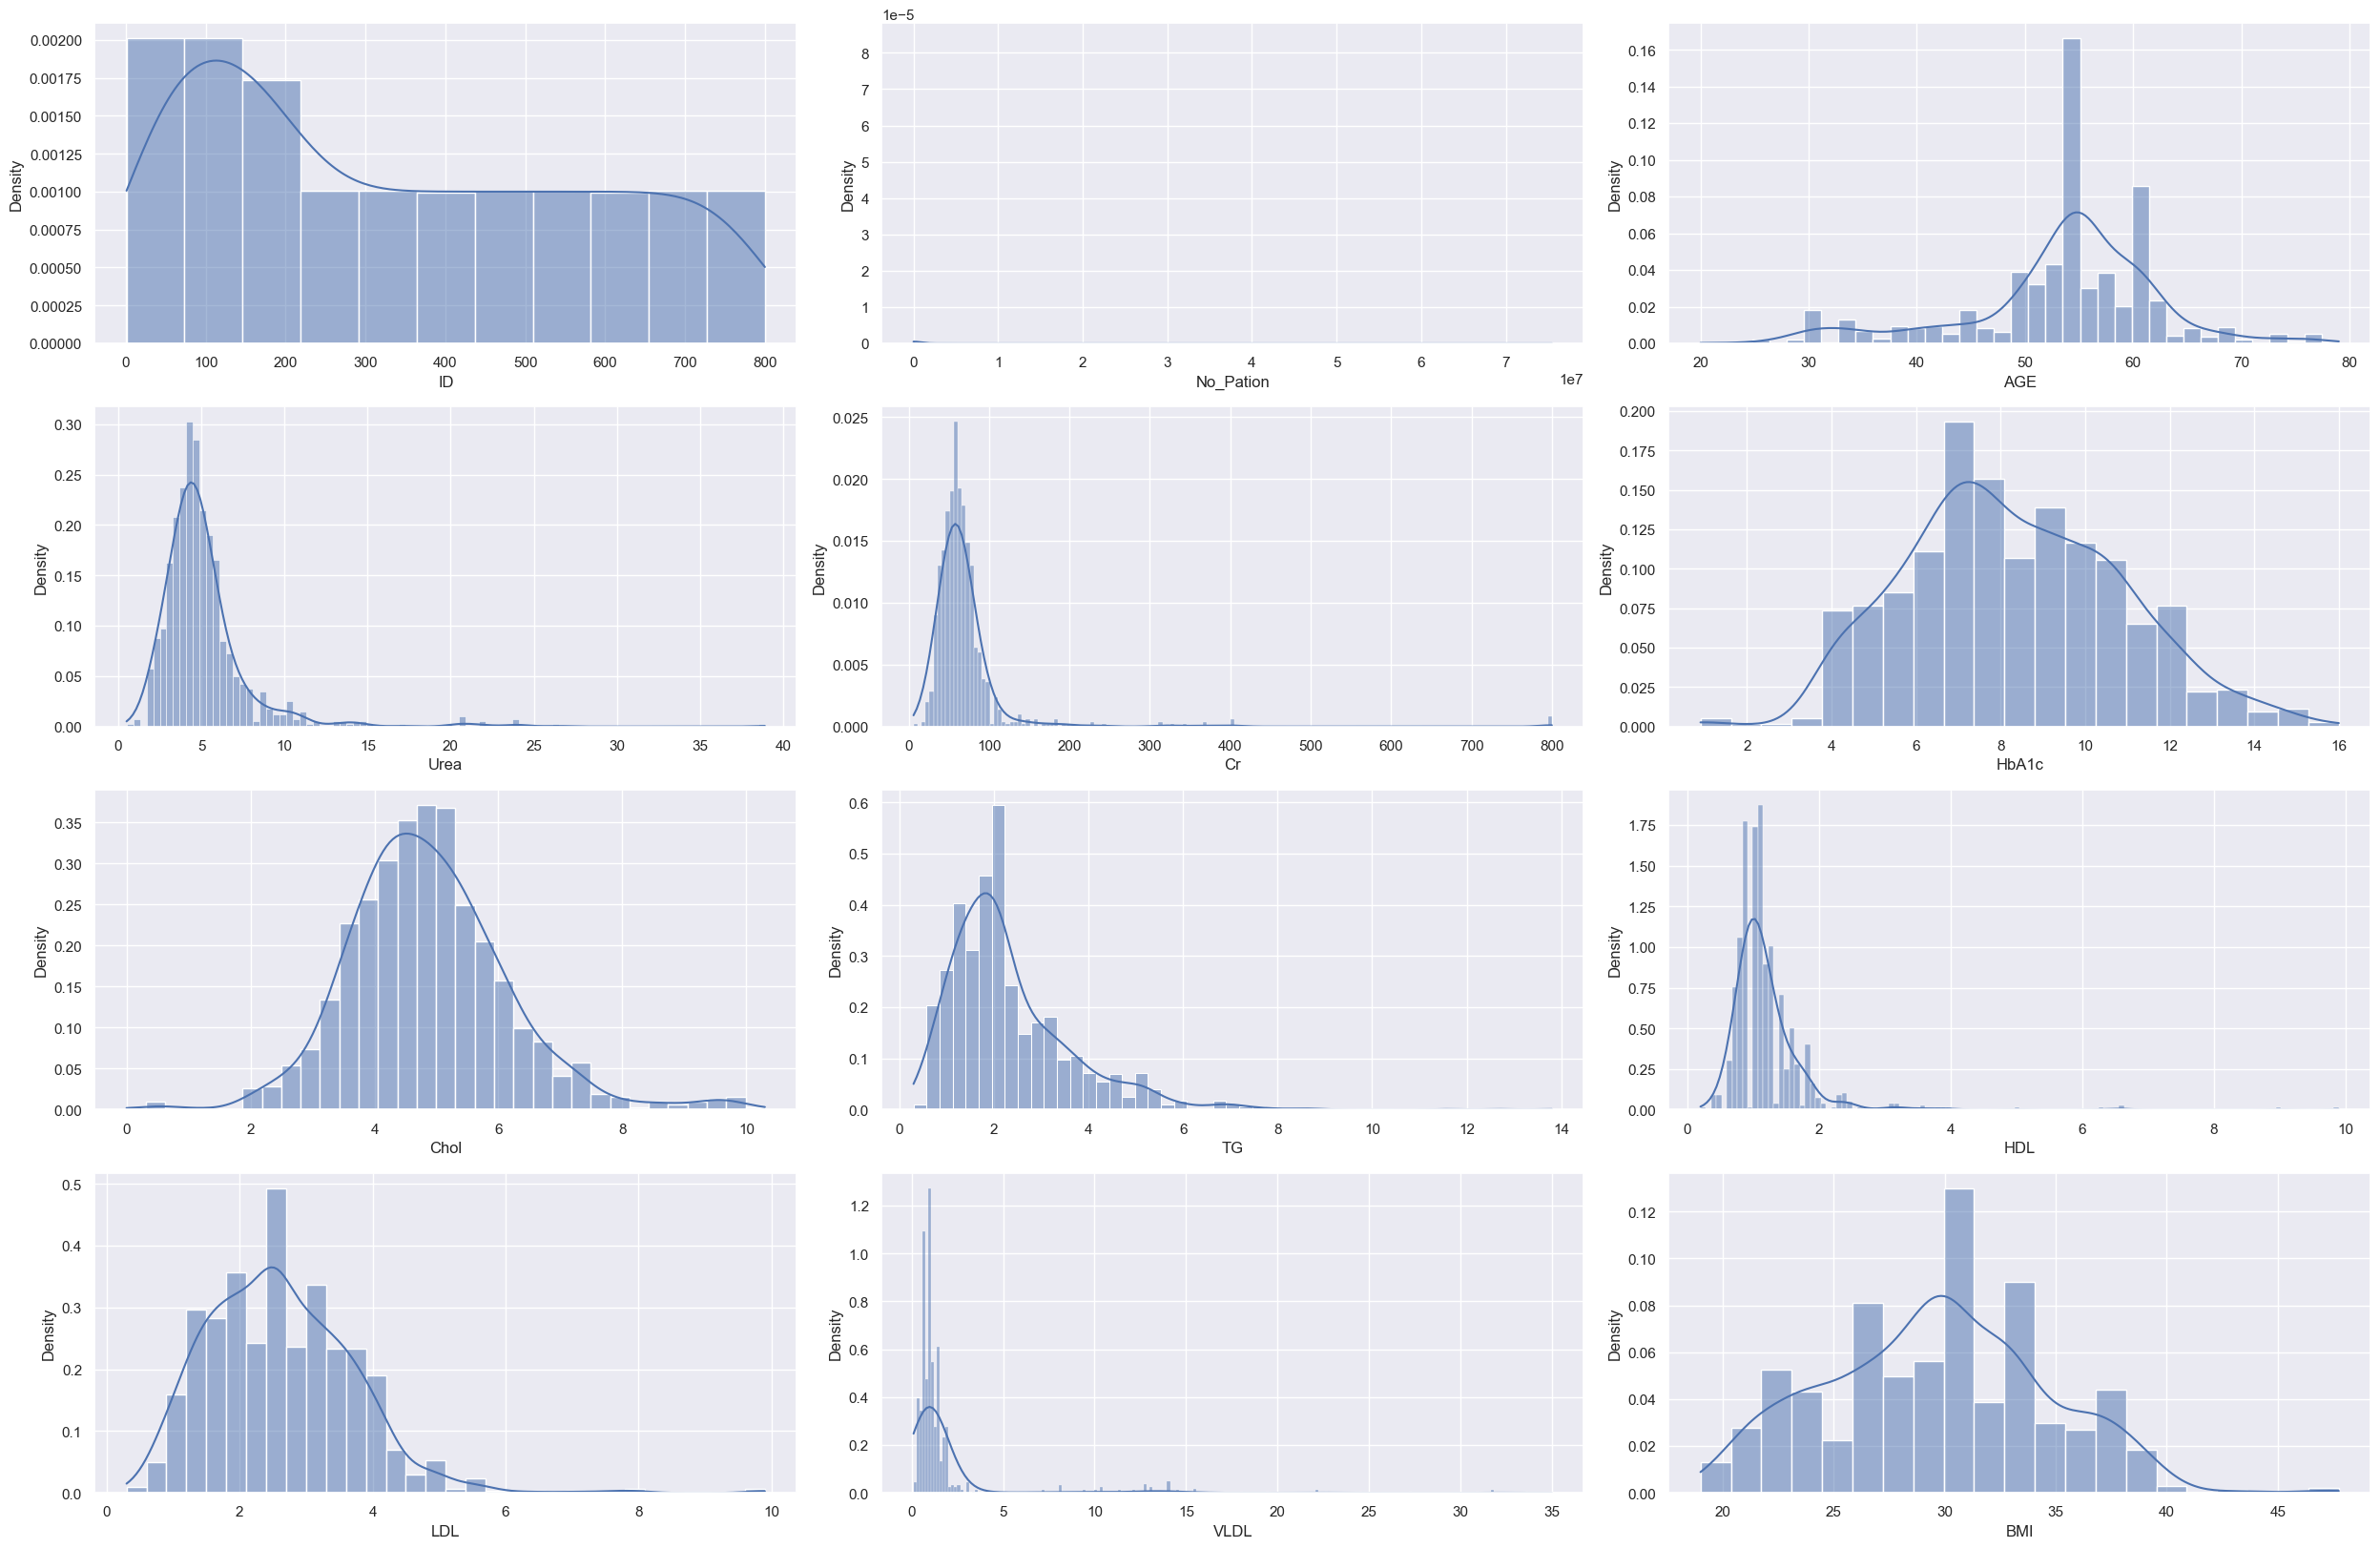

In [21]:
cols = data.select_dtypes(exclude='object').columns.to_list()
fig = plt.figure(figsize=(25, 40))
for i, col in enumerate(cols):
    plt.subplot(10, 3, i+1)
    sns.histplot(data[col], kde=True, stat='density')
fig.tight_layout(pad=1)

In [22]:
# Required plots
"""
    Box plot
    pair plot
    headmap
    count plot -> categorical
"""

'\n    Box plot\n    pair plot\n    headmap\n    count plot -> categorical\n'

In [23]:
# Outliers detection and drop
# label encoding for categorical

## Applying Label Encoder for Non Numerical data

In [24]:
LabelEncoder=LabelEncoder()
data_label=["Gender","CLASS"]
for label in data_label :
    LabelEncoder.fit(data[label])
    data[label]=LabelEncoder.transform(data[label])

In [25]:
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


In [26]:
data.drop(['ID', 'No_Pation'], axis=1, inplace=True)
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2
